# Trabajo Fin de Máster

### Beatriz Reca Corpas

##### Según la Organización Mundial de la Salud (OMS) las enfermedades cardiovasculares son un conjunto de trastornos del corazón y de los vasos sanguíneos. Las enfermedades cardiovasculares son la principal causa de defunción en todo el mundo.  Se estima que solo en 2012 murieron más de 17,5 millones de personas, representando así el 30% de las defunciones registradas en el mundo. De aquí al 2030, se estima que casi 23,6 millones de personas morirán por alguna enfermedad cardiovascular. Por lo que seguirá siendo la principal causa de muerte.
##### Por todo ello, el objetivo de esta práctica es predecir las personas que tienen una probabilidad más alta de fallecer. Para poder predecir esto, contaremos con variables que nos indicarán el estado en el que se encuentra su enfermedad.


##### La base de datos principal que vamos a utilizar es Heart.csv. Esta base de datos ha sido extraída de la librería sashelp del software estadístico SAS (Statistical Analysis System).  Además de las variables de las que disponemos en nuestro conjunto de datos, hay otras que podrían ser relevantes en la predicción. Por ello, añadimos tres bases de datos, una con información del porcentaje de personas que realizan actividad física por edad y otra por sexo (dos conjuntos de datos diferenciados, ya que no tenemos la información de sexo y edad juntos), ya que la actividad física es un factor muy importante en las enfermedades. Estos datos se han extraído del INE (Instituto Nacional de Estadística):

##### https://www.ine.es/ss/SatelliteL=es_ES&c=INESeccion_C&cid=1259944495973&p=1254735110672&pagename=ProductosYServicios%2FPYSLayou&param1=PYSDetalleFichaIndicador&param3=1259947308577

##### Y otra base de datos en la que se indica las muertes atribuibles al consumo de tabaco, por cada tipo de enfermedad que tenemos en nuestra base de datos principal. Estos datos han sido extraídos del Ministerio de Sanidad.

##### https://www.mscbs.gob.es/estadEstudios/estadisticas/estadisticas/estMinisterio/mortalidad/docs/MuertesTabacoEspana2014.pdf

##### En esta práctica uniremos y limpiaremos nuestro conjunto de datos, preparandolo así para poder realizar modelos análiticos, los cuales nos proporcionen información de utilidad.

Una vez que se ha realizado el paso previo de conocimiento, limpieza, tratamiento de outliers, creación de nuevas variables en el código previo tenemos un conjunto de datos limpio llamado datos_heart_limp.csv, que utilizaremos para realizar los modelos analiticos.

In [2]:
# Importamos paquetes que pueden sernos de utilidad
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV,MultiTaskLassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2, f_classif

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score



from sklearn.utils import resample,shuffle

In [3]:
heart = pd.read_csv('datos_heart_limp.csv',sep=';')
heart

,Unnamed: 0,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,...,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown,Female,Male,Chol_Status_Num,BP_Status_Num,Weight_Status_Num,Smoking_Status_Num
0,0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,...,0,0,1,0,1,0,3,2,3,1
1,1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,...,0,0,0,0,1,0,1,3,3,1
2,2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,...,0,1,0,0,1,0,2,3,3,3
3,3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,...,0,1,0,0,1,0,2,2,3,1
4,4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,...,0,1,0,0,0,1,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,...,1,0,0,0,0,1,3,2,3,4
5205,5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,...,0,1,0,0,1,0,3,2,3,2
5206,5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,...,0,1,0,0,1,0,1,3,3,2
5207,5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,...,1,0,0,0,0,1,3,1,3,5


In [4]:
heart.drop("Unnamed: 0", axis = 1, inplace = True)
heart

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown,Female,Male,Chol_Status_Num,BP_Status_Num,Weight_Status_Num,Smoking_Status_Num
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,0,0,1,0,1,0,3,2,3,1
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,0,0,0,0,1,0,1,3,3,1
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,0,1,0,0,1,0,2,3,3,3
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,0,1,0,0,1,0,2,2,3,1
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,0,1,0,0,0,1,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,1,0,0,0,0,1,3,2,3,4
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,0,1,0,0,1,0,3,2,3,2
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,0,1,0,0,1,0,1,3,3,2
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,1,0,0,0,0,1,3,1,3,5


Nuestro conjunto de datos tiene 5209 filas y 36 columnas. 

Lo primero que vamos a hacer es eliminar algunas variables de nuestro conjunto de datos que no se pueden utilizar en la modelización por distintos motivos.

        - Eliminamos las variables alfanuméricas, ya que hemos realizado en la limpieza y tratamiento de los datos variables 
          numéricas a partir de las alfanuméricas.
        - Eliminamos variables que no podemos saber de primeras debido a que no sabemos si el paciente va a fallecer o no.

In [5]:

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Status                     5209 non-null   object 
 1   DeathCause                 5209 non-null   object 
 2   AgeCHDdiag                 5209 non-null   float64
 3   Sex                        5209 non-null   object 
 4   AgeAtStart                 5209 non-null   int64  
 5   Height                     5209 non-null   float64
 6   Weight                     5209 non-null   float64
 7   Diastolic                  5209 non-null   int64  
 8   Systolic                   5209 non-null   int64  
 9   MRW                        5209 non-null   float64
 10  Smoking                    5209 non-null   float64
 11  AgeAtDeath                 5209 non-null   float64
 12  Cholesterol                5209 non-null   float64
 13  Chol_Status                5209 non-null   objec

In [6]:
# Variables creadas como numéricas 

heart=heart.drop(['Status'],axis=1)
heart=heart.drop(['DeathCause'],axis=1)
heart=heart.drop(['Sex'],axis=1)
heart=heart.drop(['Chol_Status'],axis=1)
heart=heart.drop(['BP_Status'],axis=1)
heart=heart.drop(['Weight_Status'],axis=1)
heart=heart.drop(['Smoking_Status'],axis=1)

# Variables desconocidas en un primer momento


heart=heart.drop(['AgeAtDeath'],axis=1)
heart=heart.drop(['Muertes_por_tabaco'],axis=1)
heart=heart.drop(['AgeDisease'],axis=1)
heart=heart.drop(['Cancer'],axis=1)
heart=heart.drop(['Cerebral Vascular Disease'],axis=1)
heart=heart.drop(['Coronary Heart Disease'],axis=1)
heart=heart.drop(['Non-fatal heart disease'],axis=1)
heart=heart.drop(['Other'],axis=1)
heart=heart.drop(['Unknown'],axis=1)



Con las variables que nos quedan despues de eliminar las que creemos necesarias procedemos a estudiar la correlación de las variables

In [7]:
corr_matrix =heart.corr().abs()
corr_matrix

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,Cholesterol,Ejercicio Regular_Sexo,Sedentarismo_Sexo,Ejercicio_Regular_edad,Sedentarismo_edad,Target,Female,Male,Chol_Status_Num,BP_Status_Num,Weight_Status_Num,Smoking_Status_Num
AgeCHDdiag,1.000000,0.288898,0.110095,0.068321,0.014899,0.045637,0.007184,0.157771,0.008411,0.101392,0.101392,0.254777,0.029882,0.022372,0.101392,0.101392,0.013043,0.015850,0.005198,0.158980
AgeAtStart,0.288898,1.000000,0.131657,0.093538,0.275401,0.379379,0.204445,0.166978,0.269279,0.002226,0.002226,0.897403,0.062411,0.435570,0.002226,0.002226,0.112572,0.303144,0.177154,0.185375
Height,0.110095,0.131657,1.000000,0.517251,0.014199,0.071064,0.136229,0.284503,0.078118,0.693081,0.693081,0.116328,0.029208,0.038225,0.693081,0.693081,0.006676,0.002872,0.049025,0.283018
Weight,0.068321,0.093538,0.517251,1.000000,0.327386,0.263583,0.767174,0.088001,0.071178,0.448360,0.448360,0.091800,0.004813,0.140965,0.448360,0.448360,0.073908,0.291380,0.535702,0.056702
Diastolic,0.014899,0.275401,0.014199,0.327386,1.000000,0.796061,0.384869,0.064252,0.181047,0.060892,0.060892,0.249177,0.043117,0.252783,0.060892,0.060892,0.075363,0.744042,0.266815,0.083526
Systolic,0.045637,0.379379,0.071064,0.263583,0.796061,1.000000,0.362546,0.092091,0.196709,0.001093,0.001093,0.334484,0.011053,0.306604,0.001093,0.001093,0.069384,0.729506,0.230031,0.113378
MRW,0.007184,0.204445,0.136229,0.767174,0.384869,0.362546,1.000000,0.123765,0.133867,0.045105,0.045105,0.190482,0.024975,0.126098,0.045105,0.045105,0.076503,0.333738,0.643004,0.156892
Smoking,0.157771,0.166978,0.284503,0.088001,0.064252,0.092091,0.123765,1.000000,0.010680,0.362742,0.362742,0.135692,0.025985,0.095188,0.362742,0.362742,0.010816,0.047275,0.092184,0.957493
Cholesterol,0.008411,0.269279,0.078118,0.071178,0.181047,0.196709,0.133867,0.010680,1.000000,0.026608,0.026608,0.242917,0.042225,0.152234,0.026608,0.026608,0.290546,0.187090,0.139525,0.020058
Ejercicio Regular_Sexo,0.101392,0.002226,0.693081,0.448360,0.060892,0.001093,0.045105,0.362742,0.026608,1.000000,1.000000,0.001455,0.015617,0.160563,1.000000,1.000000,0.039651,0.078259,0.036316,0.347692


Es complicado analizar una tabla de correlación por lo que procedemos a hacer un  gáfico de correlaciones

<AxesSubplot:>

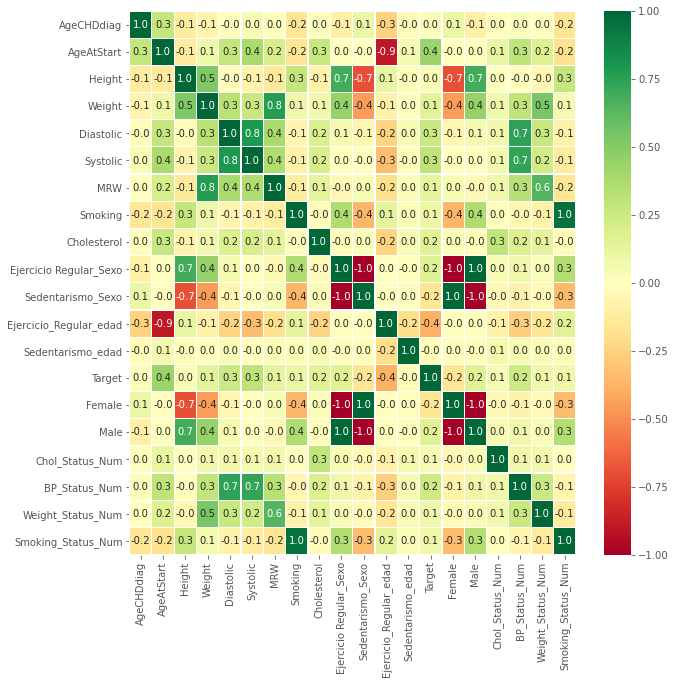

In [8]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heart.corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'RdYlGn', ax=ax)

Como vemos tenemos correlaciones perfecta entre algunas variables, esto se debe a que la pertenencia o no pertenencia a uno determina automaticamente que no pertenece al otro. Por lo que eliminaremos una de las dos variables para realizar el estudio 

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AgeCHDdiag              5209 non-null   float64
 1   AgeAtStart              5209 non-null   int64  
 2   Height                  5209 non-null   float64
 3   Weight                  5209 non-null   float64
 4   Diastolic               5209 non-null   int64  
 5   Systolic                5209 non-null   int64  
 6   MRW                     5209 non-null   float64
 7   Smoking                 5209 non-null   float64
 8   Cholesterol             5209 non-null   float64
 9   Ejercicio Regular_Sexo  5209 non-null   float64
 10  Sedentarismo_Sexo       5209 non-null   float64
 11  Ejercicio_Regular_edad  5209 non-null   float64
 12  Sedentarismo_edad       5209 non-null   float64
 13  Target                  5209 non-null   int64  
 14  Female                  5209 non-null   

In [10]:
heart=heart.drop(['Male'],axis=1)
heart=heart.drop(['Sedentarismo_Sexo'],axis=1)

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AgeCHDdiag              5209 non-null   float64
 1   AgeAtStart              5209 non-null   int64  
 2   Height                  5209 non-null   float64
 3   Weight                  5209 non-null   float64
 4   Diastolic               5209 non-null   int64  
 5   Systolic                5209 non-null   int64  
 6   MRW                     5209 non-null   float64
 7   Smoking                 5209 non-null   float64
 8   Cholesterol             5209 non-null   float64
 9   Ejercicio Regular_Sexo  5209 non-null   float64
 10  Ejercicio_Regular_edad  5209 non-null   float64
 11  Sedentarismo_edad       5209 non-null   float64
 12  Target                  5209 non-null   int64  
 13  Female                  5209 non-null   int64  
 14  Chol_Status_Num         5209 non-null   

<AxesSubplot:>

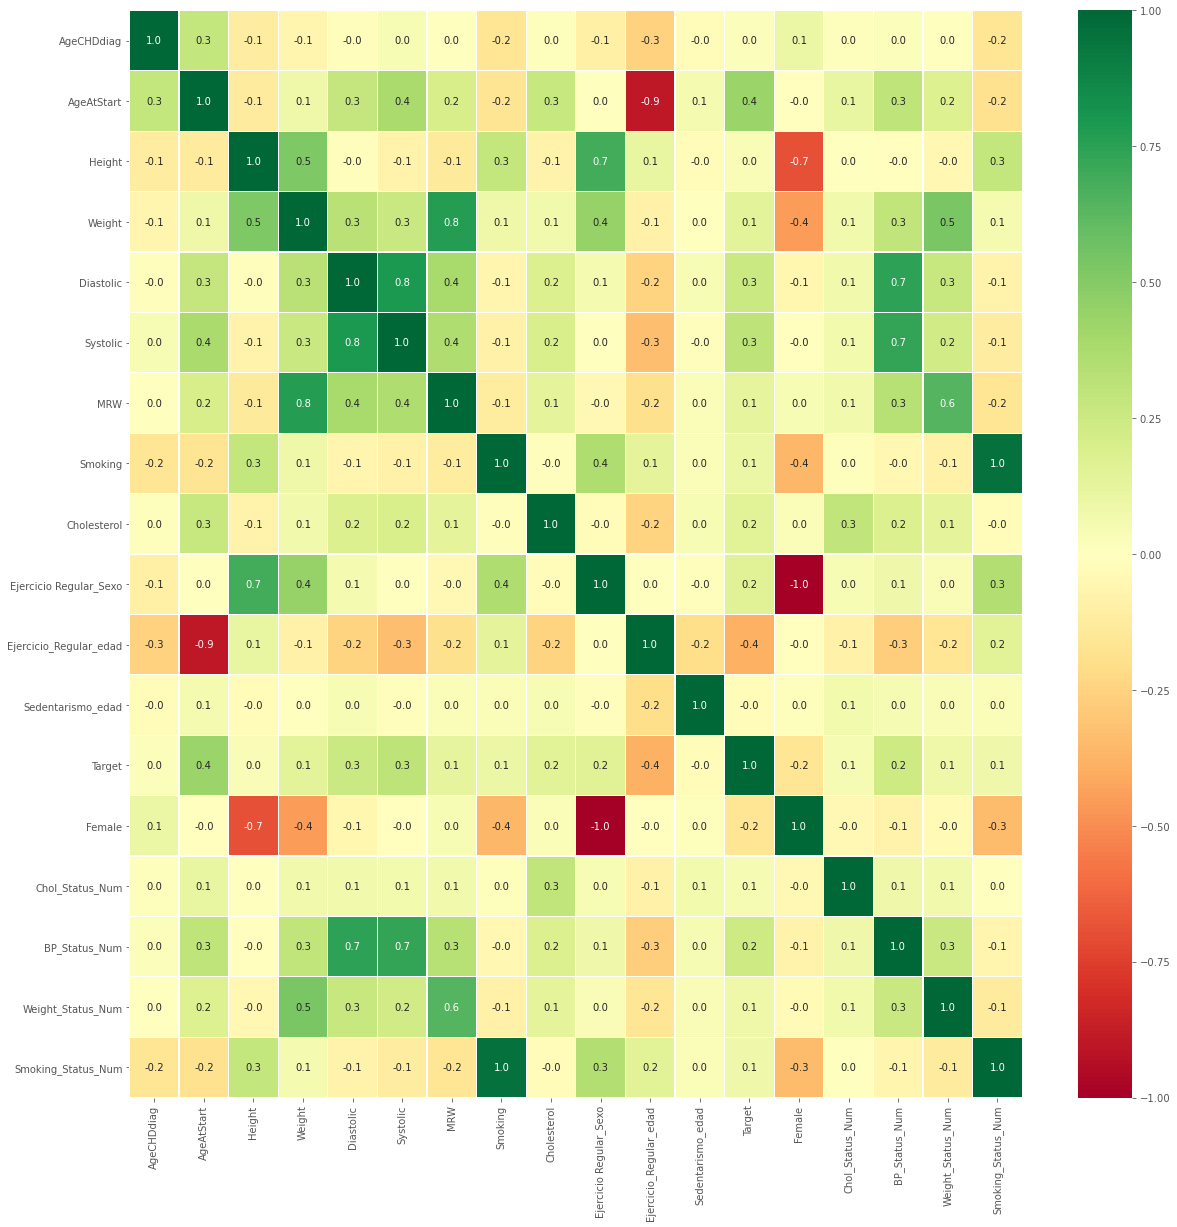

In [12]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart.corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'RdYlGn', ax=ax)

Eliminaremos la variable Ejercicio_Regular_Sexo

In [13]:
heart=heart.drop(['Ejercicio Regular_Sexo'],axis=1)


In [14]:
heart=heart.drop(['Ejercicio_Regular_edad'],axis=1)

In [15]:
heart=heart.drop(['Smoking'],axis=1)

<AxesSubplot:>

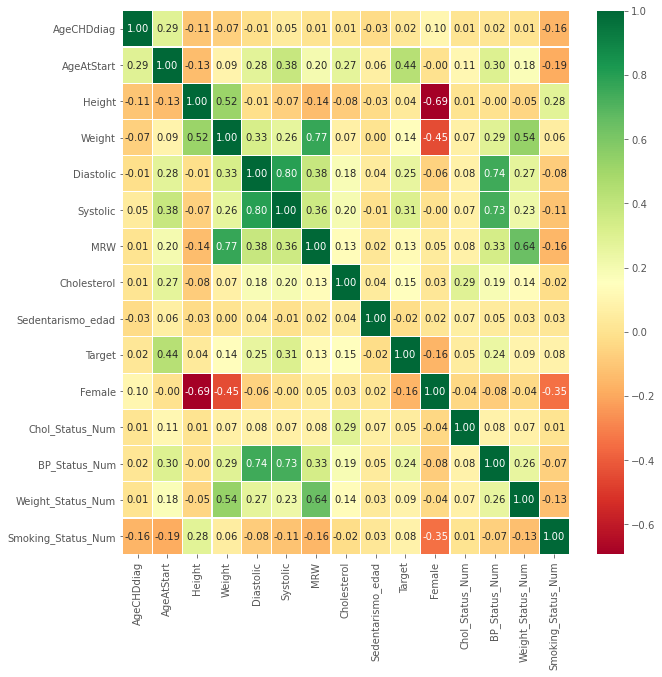

In [16]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heart.corr(), annot=True, linewidths=.18, fmt= '.2f',cmap= 'RdYlGn', ax=ax)

Podemos ver que la variable target no se encuentra excesivamente correlacionada con ninguna de las variables presentes.Por lo que esto nos indica que necesitaremos la presencia de varias variables en nuestro modelo, ya que no tenemos ninguna que explique la variable objetivo por si sola. Ordenamos las correlaciones y vemos como se relacionan con la variable objetivo

In [17]:
corr_matrix =heart.corr().abs()
corr_matrix

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Cholesterol,Sedentarismo_edad,Target,Female,Chol_Status_Num,BP_Status_Num,Weight_Status_Num,Smoking_Status_Num
AgeCHDdiag,1.000000,0.288898,0.110095,0.068321,0.014899,0.045637,0.007184,0.008411,0.029882,0.022372,0.101392,0.013043,0.015850,0.005198,0.158980
AgeAtStart,0.288898,1.000000,0.131657,0.093538,0.275401,0.379379,0.204445,0.269279,0.062411,0.435570,0.002226,0.112572,0.303144,0.177154,0.185375
Height,0.110095,0.131657,1.000000,0.517251,0.014199,0.071064,0.136229,0.078118,0.029208,0.038225,0.693081,0.006676,0.002872,0.049025,0.283018
Weight,0.068321,0.093538,0.517251,1.000000,0.327386,0.263583,0.767174,0.071178,0.004813,0.140965,0.448360,0.073908,0.291380,0.535702,0.056702
Diastolic,0.014899,0.275401,0.014199,0.327386,1.000000,0.796061,0.384869,0.181047,0.043117,0.252783,0.060892,0.075363,0.744042,0.266815,0.083526
Systolic,0.045637,0.379379,0.071064,0.263583,0.796061,1.000000,0.362546,0.196709,0.011053,0.306604,0.001093,0.069384,0.729506,0.230031,0.113378
MRW,0.007184,0.204445,0.136229,0.767174,0.384869,0.362546,1.000000,0.133867,0.024975,0.126098,0.045105,0.076503,0.333738,0.643004,0.156892
Cholesterol,0.008411,0.269279,0.078118,0.071178,0.181047,0.196709,0.133867,1.000000,0.042225,0.152234,0.026608,0.290546,0.187090,0.139525,0.020058
Sedentarismo_edad,0.029882,0.062411,0.029208,0.004813,0.043117,0.011053,0.024975,0.042225,1.000000,0.019526,0.015617,0.066535,0.047135,0.034602,0.026212
Target,0.022372,0.435570,0.038225,0.140965,0.252783,0.306604,0.126098,0.152234,0.019526,1.000000,0.160563,0.051557,0.242443,0.090893,0.083667


<AxesSubplot:>

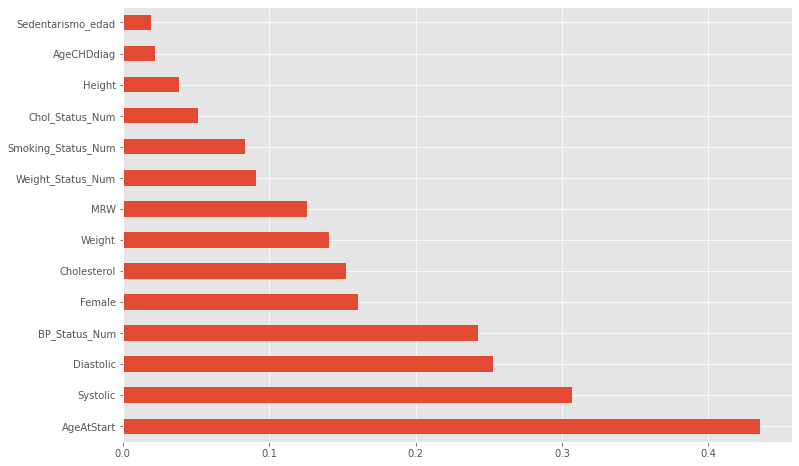

In [18]:
(corr_matrix
     .Target
     .drop('Target')
     .sort_values(ascending=False)
     .plot
     .barh())

Como vemos las variables que se encuentran más correlacionadas con la variable objetivo son la edad del comienzo de la enfermedad y la variable de ejercicio regular por edad que se ha añadido de un dataset externo.
Lo primero que haremos será separar la la variable target del conjunto de datos

In [17]:
heart_target = heart['Target']
heart_sintarget = heart.drop(columns = ['Target'])
heart_sintarget_norm = MinMaxScaler().fit_transform(heart_sintarget)
print(heart_target.shape)
print(heart_sintarget.shape)

(5209,)
(5209, 14)


In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgeCHDdiag          5209 non-null   float64
 1   AgeAtStart          5209 non-null   int64  
 2   Height              5209 non-null   float64
 3   Weight              5209 non-null   float64
 4   Diastolic           5209 non-null   int64  
 5   Systolic            5209 non-null   int64  
 6   MRW                 5209 non-null   float64
 7   Cholesterol         5209 non-null   float64
 8   Sedentarismo_edad   5209 non-null   float64
 9   Target              5209 non-null   int64  
 10  Female              5209 non-null   int64  
 11  Chol_Status_Num     5209 non-null   int64  
 12  BP_Status_Num       5209 non-null   int64  
 13  Weight_Status_Num   5209 non-null   int64  
 14  Smoking_Status_Num  5209 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 610.6 KB


#### Variance Threshold

A continuación, vamos a utilizar el selector VarianceThreshold, selecciona variables para eliminar de la selección, por defecto lo que hace es eliminar las variables con baja varianza.

In [19]:
variables = []
selector = VarianceThreshold(threshold=0.2)
np.shape(selector.fit_transform(heart_sintarget_norm))
variables.append(list(np.array(heart_sintarget.columns)[selector.get_support(indices=False)]))
variables

[['Female', 'Weight_Status_Num']]

#### Selección de modelo

La función SelectfromModel nos permite definir un estimador para seleccionar variables que puedan resultar importantes. En función de los modelos que se prueben se puede ver su importancia a partir de un peso.

Utilizaremos LASSO, modelo lineal estándar

In [20]:
var = []

In [21]:
lasso = MultiTaskLassoCV(cv=3).fit(heart_sintarget_norm, heart_sintarget)
modelo = SelectFromModel(lasso, prefit=True)
X = modelo.transform(heart_sintarget_norm)
X_df = pd.DataFrame(X, columns=[heart_sintarget.columns[i] for i in range(len(heart_sintarget.columns)) if modelo.get_support()[i]])
var.append(X_df.columns.tolist())

In [22]:
var

[['AgeCHDdiag',
  'AgeAtStart',
  'Height',
  'Weight',
  'Diastolic',
  'Systolic',
  'MRW',
  'Cholesterol',
  'Sedentarismo_edad',
  'Female',
  'Chol_Status_Num',
  'BP_Status_Num',
  'Weight_Status_Num',
  'Smoking_Status_Num']]

#### Selección Univariable - SelectKBest

Scikit-learn tiene una clase que puede ser utilizada con una variedad de test estadísticos para seleccionar una cantidad específica de variables.

Se pueden ajustar los parámetros de score_func (el test a utilizar) y k (cantidad de clases)

##### CHI2

In [23]:
stat_test_var = []

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(heart_sintarget_norm, heart_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(heart_sintarget.columns)


# Visualizamos el score de cada feature en una columna 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
# Almacenamos las mejores 10 en función del score asignado
stat_test_var.append(featureScores.nlargest(10,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

               Feature       Score
1           AgeAtStart  132.981449
11       BP_Status_Num   60.811125
9               Female   60.223224
5             Systolic   23.049806
13  Smoking_Status_Num   14.954884
4            Diastolic   14.400121
12   Weight_Status_Num   12.374647
3               Weight    4.309058
10     Chol_Status_Num    3.983412
7          Cholesterol    3.819123
6                  MRW    3.103301
8    Sedentarismo_edad    0.419644
2               Height    0.293148
0           AgeCHDdiag    0.040370


In [25]:
stat_test_var

[['AgeAtStart',
  'BP_Status_Num',
  'Female',
  'Systolic',
  'Smoking_Status_Num',
  'Diastolic',
  'Weight_Status_Num',
  'Weight',
  'Chol_Status_Num',
  'Cholesterol']]

##### Annova

In [26]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(heart_sintarget_norm, heart_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(heart_sintarget.columns)

# Visualizamos el score de cada feature en una columna 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
# Almacenamos las mejores 10 en función del score asignado
stat_test_var.append(featureScores.nlargest(10,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

               Feature        Score
1           AgeAtStart  1219.186679
5             Systolic   540.276867
4            Diastolic   355.435734
11       BP_Status_Num   325.173472
9               Female   137.791338
7          Cholesterol   123.536179
3               Weight   105.566328
6                  MRW    84.132489
12   Weight_Status_Num    43.376232
13  Smoking_Status_Num    36.707014
10     Chol_Status_Num    13.877568
2               Height     7.619430
0           AgeCHDdiag     2.607360
8    Sedentarismo_edad     1.985994


In [27]:
stat_test_var

[['AgeAtStart',
  'BP_Status_Num',
  'Female',
  'Systolic',
  'Smoking_Status_Num',
  'Diastolic',
  'Weight_Status_Num',
  'Weight',
  'Chol_Status_Num',
  'Cholesterol'],
 ['AgeAtStart',
  'Systolic',
  'Diastolic',
  'BP_Status_Num',
  'Female',
  'Cholesterol',
  'Weight',
  'MRW',
  'Weight_Status_Num',
  'Smoking_Status_Num']]

#### Eliminación de variables recursivas

Dentro de sklearn podemos encontrar una función(recursive feature) , sirve para asignar pesos a las variables. La función RFE selecciona recursivamente un conjunto de variables acotandolo cada vez más

In [28]:
rfe_var = []

##### RFE Regresión Logística


In [29]:
rfe_select = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=2, verbose=2)
rfe_select.fit(heart_sintarget_norm, heart_target)
rfe_support = rfe_select.get_support()
rfe_feature = heart_sintarget.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_var.append(rfe_feature)

Fitting estimator with 14 features.
Fitting estimator with 12 features.
10 selected features


##### RFE Random Forest


In [30]:
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=200), n_features_to_select=10, step=2, verbose=2)
rfe_selector.fit(heart_sintarget_norm, heart_target)
rfe_support = rfe_selector.get_support()
rfe_feature = heart_sintarget.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_var.append(rfe_feature)

Fitting estimator with 14 features.
Fitting estimator with 12 features.
10 selected features


Veremos que variables se encuentran en ambos casos.

In [31]:

main_cols_min = rfe_var[0]
for i in range(len(rfe_var)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(rfe_var[i+1])))
main_cols_min

['Smoking_Status_Num',
 'AgeAtStart',
 'Weight',
 'Height',
 'AgeCHDdiag',
 'Systolic',
 'MRW',
 'Cholesterol',
 'Diastolic']

#### Mejores Features

A partir de los análisis de selección de variables realizados, se eligen las mejores variables para probar en modelos.


In [32]:

best_var = []
best_var.append(variables[0])
best_var.append(var[0])
best_var.append(stat_test_var[0])
best_var.append(stat_test_var[1])
best_var.append(rfe_var[0])
best_var.append(rfe_var[1])


main_cols_max = best_var[0]
for i in range(len(best_var)-1):
    main_cols_max = list(set(main_cols_max).union(set(best_var[i+1])))
print(main_cols_max)

main_cols_min = best_var[0]
for i in range(len(best_var)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(best_var[i+1])))
print(main_cols_min)

['Chol_Status_Num', 'Smoking_Status_Num', 'AgeAtStart', 'Weight', 'AgeCHDdiag', 'Systolic', 'Cholesterol', 'Diastolic', 'Height', 'Weight_Status_Num', 'MRW', 'BP_Status_Num', 'Female', 'Sedentarismo_edad']
[]


In [33]:
print(len(main_cols_max))
print(len(main_cols_min))

14
0


In [34]:
# Ordenar las variables en función de la cantidad de veces que fueron seleccionadas por algún método
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in heart.columns.tolist()}
for i in range(len(best_var)):
    for feature_name in best_var[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(19)

,Num
AgeAtStart,5
Weight,5
Diastolic,5
Systolic,5
Cholesterol,5
Female,5
Smoking_Status_Num,5
MRW,4
Weight_Status_Num,4
AgeCHDdiag,3


Como vemos tenemos variables comunes en ambos estudios, y podemos seleccionar las variables en el dataset, nos quedaremos con las siguientes variables:

In [35]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgeCHDdiag          5209 non-null   float64
 1   AgeAtStart          5209 non-null   int64  
 2   Height              5209 non-null   float64
 3   Weight              5209 non-null   float64
 4   Diastolic           5209 non-null   int64  
 5   Systolic            5209 non-null   int64  
 6   MRW                 5209 non-null   float64
 7   Cholesterol         5209 non-null   float64
 8   Sedentarismo_edad   5209 non-null   float64
 9   Target              5209 non-null   int64  
 10  Female              5209 non-null   int64  
 11  Chol_Status_Num     5209 non-null   int64  
 12  BP_Status_Num       5209 non-null   int64  
 13  Weight_Status_Num   5209 non-null   int64  
 14  Smoking_Status_Num  5209 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 610.6 KB


Seleccionaremos las siguientes variables.

In [36]:
features=['AgeAtStart','Weight', 'Diastolic', 'Systolic', 'Cholesterol', 'Female', 'Smoking_Status_Num', 'MRW',
          'Weight_Status_Num', 'Target'] 

In [37]:
#features=['AgeAtStart', 'Diastolic', 'MRW', 'Chol_Status_Num', 'Systolic', 'Height', 'Smoking_Status_Num', 'Target','Weight','Ejercicio_Regular_edad','Sedentarismo_edad','Female','BP_Status_Num'] 

In [38]:
heart=heart[features]
heart

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
0,29,140.0,78,124,223.0,1,1,121.0,3,1
1,41,194.0,92,144,181.0,1,1,183.0,3,1
2,57,132.0,90,170,250.0,1,3,114.0,3,0
3,39,158.0,80,128,242.0,1,1,123.0,3,0
4,42,156.0,76,110,281.0,0,4,116.0,3,0
...,...,...,...,...,...,...,...,...,...,...
5204,49,173.0,80,110,228.0,0,4,135.0,3,1
5205,42,141.0,76,124,209.0,1,2,129.0,3,0
5206,51,123.0,90,152,197.0,1,2,119.0,3,0
5207,36,164.0,64,108,238.0,0,5,114.0,3,1


array([[<AxesSubplot:title={'center':'AgeAtStart'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Diastolic'}>],
       [<AxesSubplot:title={'center':'Systolic'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'Female'}>],
       [<AxesSubplot:title={'center':'Smoking_Status_Num'}>,
        <AxesSubplot:title={'center':'MRW'}>,
        <AxesSubplot:title={'center':'Weight_Status_Num'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

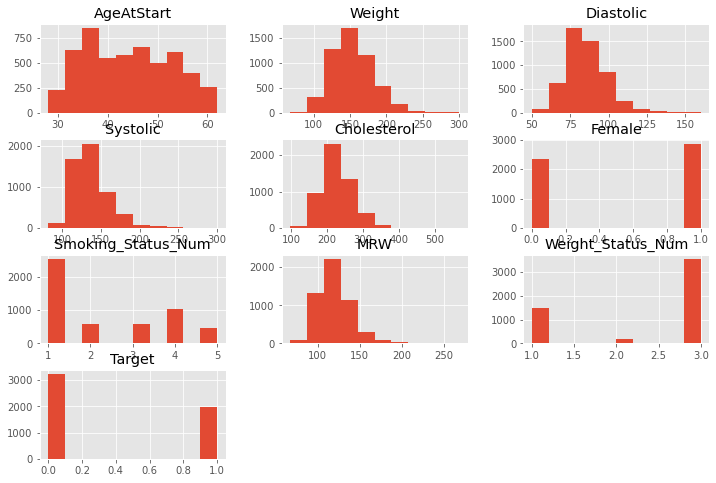

In [39]:
heart.hist()

In [40]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgeAtStart          5209 non-null   int64  
 1   Weight              5209 non-null   float64
 2   Diastolic           5209 non-null   int64  
 3   Systolic            5209 non-null   int64  
 4   Cholesterol         5209 non-null   float64
 5   Female              5209 non-null   int64  
 6   Smoking_Status_Num  5209 non-null   int64  
 7   MRW                 5209 non-null   float64
 8   Weight_Status_Num   5209 non-null   int64  
 9   Target              5209 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 407.1 KB


## Modelado

#### Balanceo de datos

<AxesSubplot:>

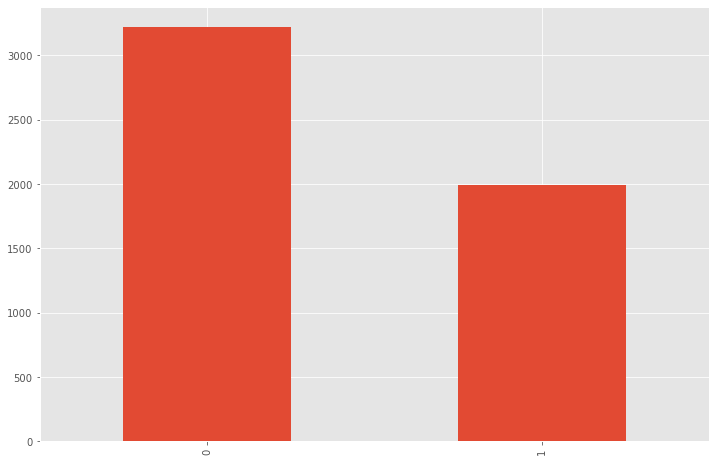

In [41]:
heart['Target'].value_counts().plot.bar()

In [42]:
# Como vemos tenemos un 60% de valores con 0 y un 40% de valores con 1. Por lo que utilizaremos oversamplig para elevar 
#el número de Target =1


In [43]:
Heart_1=heart[heart['Target']==1]
Heart_0=heart[heart['Target']!=1]

In [44]:
Heart_1

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
0,29,140.0,78,124,223.0,1,1,121.0,3,1
1,41,194.0,92,144,181.0,1,1,183.0,3,1
7,53,130.0,80,114,276.0,0,1,99.0,1,1
9,52,129.0,78,124,284.0,0,2,106.0,1,1
17,56,122.0,72,120,194.0,0,3,87.0,2,1
...,...,...,...,...,...,...,...,...,...,...
5199,58,255.0,88,130,260.0,0,5,158.0,3,1
5200,47,186.0,105,155,199.0,0,2,133.0,3,1
5202,59,177.0,68,108,246.0,0,4,113.0,3,1
5204,49,173.0,80,110,228.0,0,4,135.0,3,1


In [45]:
Heart_0

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
2,57,132.0,90,170,250.0,1,3,114.0,3,0
3,39,158.0,80,128,242.0,1,1,123.0,3,0
4,42,156.0,76,110,281.0,0,4,116.0,3,0
5,58,131.0,92,176,196.0,1,1,117.0,3,0
6,36,136.0,80,112,196.0,1,3,110.0,3,0
...,...,...,...,...,...,...,...,...,...,...
5201,59,156.0,84,124,223.0,0,4,116.0,3,0
5203,55,163.0,74,108,231.0,1,1,123.0,3,0
5205,42,141.0,76,124,209.0,1,2,129.0,3,0
5206,51,123.0,90,152,197.0,1,2,119.0,3,0


In [46]:

heart_1_upsampled = resample(Heart_1,random_state=42,n_samples=3218,replace=True)

In [47]:
heart_1_upsampled

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
3095,32,180.0,100,142,242.0,0,1,122.0,3,1
3984,34,211.0,100,156,217.0,0,2,147.0,3,1
2326,49,161.0,94,154,309.0,0,3,123.0,3,1
3571,42,188.0,96,172,192.0,0,5,139.0,3,1
3114,57,167.0,134,234,250.0,0,1,130.0,3,1
...,...,...,...,...,...,...,...,...,...,...
2063,59,116.0,96,150,192.0,1,1,116.0,3,1
2665,60,180.0,92,170,425.0,1,1,150.0,3,1
1190,58,170.0,124,210,245.0,0,1,118.0,3,1
4931,48,177.0,108,172,260.0,0,1,131.0,3,1


In [48]:
Heart_0

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
2,57,132.0,90,170,250.0,1,3,114.0,3,0
3,39,158.0,80,128,242.0,1,1,123.0,3,0
4,42,156.0,76,110,281.0,0,4,116.0,3,0
5,58,131.0,92,176,196.0,1,1,117.0,3,0
6,36,136.0,80,112,196.0,1,3,110.0,3,0
...,...,...,...,...,...,...,...,...,...,...
5201,59,156.0,84,124,223.0,0,4,116.0,3,0
5203,55,163.0,74,108,231.0,1,1,123.0,3,0
5205,42,141.0,76,124,209.0,1,2,129.0,3,0
5206,51,123.0,90,152,197.0,1,2,119.0,3,0


In [49]:
heart = pd.concat([heart_1_upsampled,Heart_0])

In [50]:
heart

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num,Target
3095,32,180.0,100,142,242.0,0,1,122.0,3,1
3984,34,211.0,100,156,217.0,0,2,147.0,3,1
2326,49,161.0,94,154,309.0,0,3,123.0,3,1
3571,42,188.0,96,172,192.0,0,5,139.0,3,1
3114,57,167.0,134,234,250.0,0,1,130.0,3,1
...,...,...,...,...,...,...,...,...,...,...
5201,59,156.0,84,124,223.0,0,4,116.0,3,0
5203,55,163.0,74,108,231.0,1,1,123.0,3,0
5205,42,141.0,76,124,209.0,1,2,129.0,3,0
5206,51,123.0,90,152,197.0,1,2,119.0,3,0


In [51]:
heart['Target'].value_counts()

1    3218
0    3218
Name: Target, dtype: int64

<AxesSubplot:>

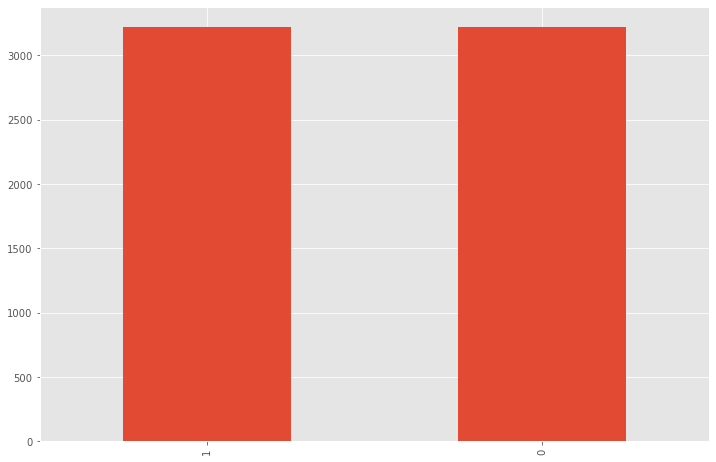

In [52]:
heart['Target'].value_counts().plot.bar()

Nos guardamos una copia de nuestro conjunto de datos una vez que se ha realizado el sobremuestreo, para utilizar AWS

In [54]:
heart.to_csv('datos_heart_sobre.csv',sep=';')

#### Partición del conjunto de datos

In [53]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        heart.drop(columns = ["Target"] ),
                                        heart["Target"] ,
                                        test_size=0.25,
                                        random_state = 1234
                                    )

In [54]:
X_train

,AgeAtStart,Weight,Diastolic,Systolic,Cholesterol,Female,Smoking_Status_Num,MRW,Weight_Status_Num
3409,47,183.0,108,170,224.0,0,4,124.0,3
3547,56,188.0,100,158,285.0,0,1,131.0,3
3267,59,119.0,106,216,212.0,1,4,112.0,3
4341,59,133.0,95,150,233.0,1,1,125.0,3
3796,54,183.0,78,192,246.0,1,1,168.0,3
...,...,...,...,...,...,...,...,...,...
4394,54,115.0,82,120,155.0,0,3,92.0,1
91,31,118.0,68,108,163.0,1,1,102.0,1
2515,54,160.0,88,138,234.0,1,1,151.0,3
1341,54,156.0,94,134,278.0,1,2,118.0,3


In [55]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

Vamos a normalizar los datos para que se situen entre 0 y 1 para los modelos en los que no podemso combinar variables continuas y variables binarias

In [56]:
# normalizar los datos para que vayan entre 0 y 1
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
x_train_norm = standard_scaler.fit_transform(X_train)
x_test_norm = standard_scaler.transform(X_test)
print(x_train_norm.min())
print(x_train_norm.max())

-2.9764315029705988
7.541904624837523


Seleccionamos las siguientes variables.

In [57]:
features=['AgeAtStart','Weight', 'Diastolic', 'Systolic', 'Cholesterol', 'Female', 'Smoking_Status_Num', 'MRW',
          'Weight_Status_Num'] 
#features=['AgeAtStart', 'Diastolic', 'MRW', 'Chol_Status_Num', 'Systolic', 'Height', 'Smoking_Status_Num','Weight','Ejercicio_Regular_edad','Sedentarismo_edad','Female','BP_Status_Num'] 
Target=['Target'] 

En la documentación de la Scikit-Learn Plotting Learning Curves, se obtiene una función que calcula y grafica la curva de aprendizaje, la escalabilidad y el rendimiento de un determinado modelo usando validación cruzada.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [58]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    # axes[2].grid()
    # axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    # axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1)
    # axes[2].set_xlabel("fit_times")
    # axes[2].set_ylabel("Score")
    # axes[2].set_title("Performance of the model")

    return plt

In [59]:
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

### Modelo Base

In [60]:
class RandomModel(object):

  def fit(self, X, y):
    return None

  def predict(self, X):
    return np.random.randint(0, 1, size=X.shape[0])


In [61]:
random_model = RandomModel()
random_model.fit(x_train_norm, y_train)
rm_predictions = random_model.predict(x_test_norm)

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, rm_predictions)
auc(fpr, tpr)

0.5

### Árboles de decisión


Lo primero que vamos a hacer es realizar un árbol de decisión para ver la profundidad con la que se consigue menos error.

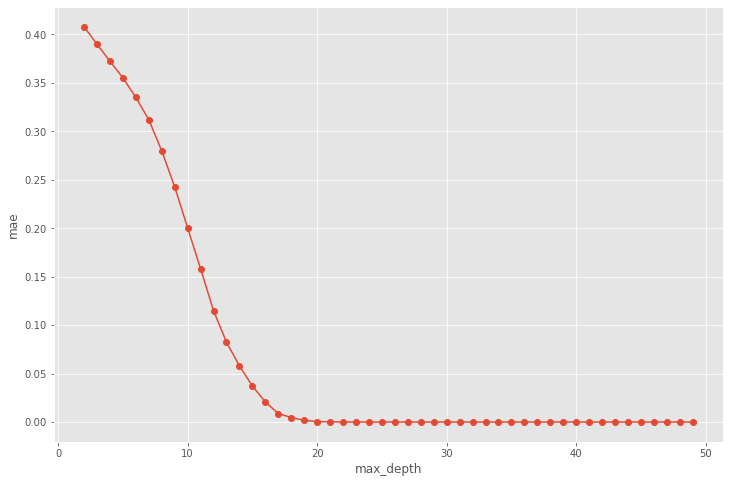

In [63]:

from sklearn.tree import DecisionTreeRegressor

# Compute the max 
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train, y_train)
    pred_values = regressor.predict(X_train)
    maev = mean_absolute_error(y_train,pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Podemos ver que en las primeras profundidades el modelo mejora considerablemente pero hay un momento en el que se estanca. Se estanca a partir de la profundidad 17. 
Tenemos que tener en cuenta que cuanta más profundidad le demos al árbol de decisión más complicado será de explicar , y aunque aprenderá con poco error, se estará sobreajustando, ya que no será capaz de predecir nuevas circunstacias en el dataset de forma correcta, solo podrá clasificar las ya conocidas.



In [64]:
train=heart

Min Value 0.21803657158312645 (29)


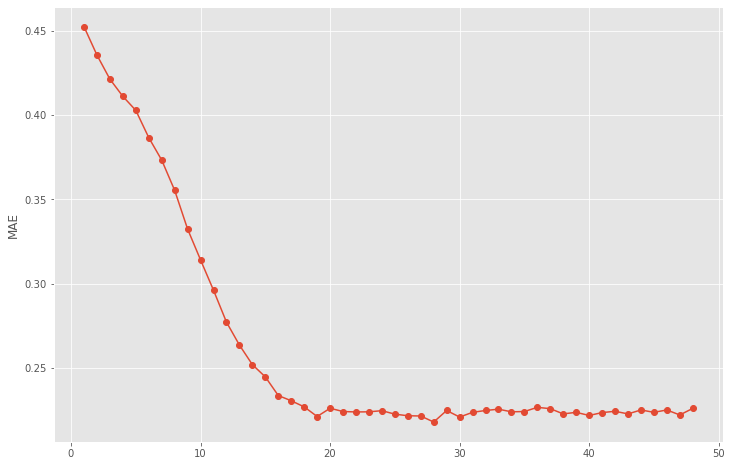

In [65]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = False) # 

# reset index
train.reset_index(drop = True, inplace = True)
train.head()

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['Target'], axis=1), 
                           y = f_train['Target'])
      y_pred = regressor.predict(X = f_test.drop(['Target'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['Target'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 

El Mae menor se obtiene en la profundidad 10, por lo que lo tendremos en cuanta a la hora de realizar el modelo

In [66]:
 regressor.feature_importances_

array([0.26940205, 0.14690713, 0.08455884, 0.14245283, 0.14428376,
       0.01771514, 0.06088987, 0.12599724, 0.00779315])

In [67]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mae', max_depth=12, random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mae', max_depth=12, random_state=0)

In [68]:
print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevances


,Attributes,Decision Tree
0,AgeAtStart,0.809283
1,Weight,0.032068
2,Diastolic,0.040506
3,Systolic,0.030380
4,Cholesterol,0.044726
5,Female,0.001688
6,Smoking_Status_Num,0.021097
7,MRW,0.019409
8,Weight_Status_Num,0.000844


Vemos que la variable con más importancia es ageatstart, esto tiene sentido debido a que personas más jovenes es posible que tengan más oportunidad de mejorar que personas más mayores.

Puntuamos el modelo 

In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

#### F1_Score

average {'micro', 'macro', 'muestras', 'ponderado', 'binario'} o Ninguno, predeterminado='binario'
Este parámetro es obligatorio para destinos multiclase/multietiqueta. Si None, se devuelven las puntuaciones de cada clase. De lo contrario, esto determina el tipo de promedio realizado en los datos:

'binary':
Informe únicamente los resultados de la clase especificada por pos_label. Esto es aplicable solo si los objetivos ( y_{true,pred}) son binarios.

'micro':
Calcule métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.

'macro':
Calcule métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.

'weighted':
Calcule métricas para cada etiqueta y encuentre su promedio ponderado por soporte (la cantidad de instancias verdaderas para cada etiqueta). Esto altera 'macro' para tener en cuenta el desequilibrio de etiquetas; puede dar como resultado una puntuación F que no se encuentra entre la precisión y la recuperación.

'samples':
Calcule las métricas para cada instancia y encuentre su promedio (solo significativo para la clasificación de múltiples etiquetas donde esto difiere de accuracy_score).

In [70]:
#f1_score(y_test, y_pred = regressor.predict(X_test), average='binary')
#f1_score(y_test, y_pred = regressor.predict(X_test), average='weighted')
#f1_score(y_test, y_pred = regressor.predict(X_test), average='micro')
 

In [71]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                 y_pred = regressor.predict(X_test), average='micro'
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.7315102548166564


In [72]:
from sklearn.metrics import accuracy_score

accuracy_en_test = accuracy_score(y_true = y_test,
                                  y_pred = regressor.predict(X_test)
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.7315102548166563


In [73]:
y_pred = regressor.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [74]:
y_test

0       1
1       1
2       0
3       0
4       1
       ..
1604    1
1605    0
1606    1
1607    1
1608    1
Name: Target, Length: 1609, dtype: int64

In [75]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

Información matriz de confusión

https://programmerclick.com/article/4356413551/

In [76]:
from sklearn.metrics import confusion_matrix

# crear matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[589, 206],
       [226, 588]], dtype=int64)

In [77]:
matriz_confusion_df = pd.DataFrame(matrix)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df

Predicho,0,1
Real,,
0,589,206
1,226,588


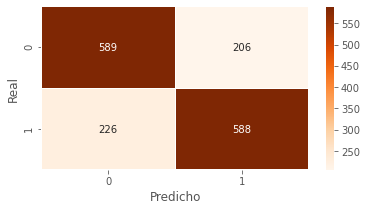

In [78]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

El modelo anterior lo hemos realizado con una validación cruzada, pero lo haremos con la librería RandomizedSearchCV para ver si obtenemos los mismos resultados


In [79]:
clf = DecisionTreeClassifier()
dtree_params = {'min_samples_leaf': [i for i in range(2,20)]}

dtree_modelo = RandomizedSearchCV(estimator = clf, param_distributions = dtree_params, n_iter = 20, 
                               cv = 10, verbose= 5, random_state= 1234, n_jobs = -1)
dtree_modelo.fit(X_train, y_train)
print(dtree_modelo.best_params_)

C:\Users\breca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.1s


{'min_samples_leaf': 2}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.4s finished


In [80]:
print(dtree_modelo.best_params_)

{'min_samples_leaf': 2}


In [81]:
print(dtree_modelo.best_score_)

0.7607243799558431


En este caso vemos que el mejor parámetro es 19, estamos definiendo una semilla en este caso, por lo que siempre obtendremos el mismo resultado

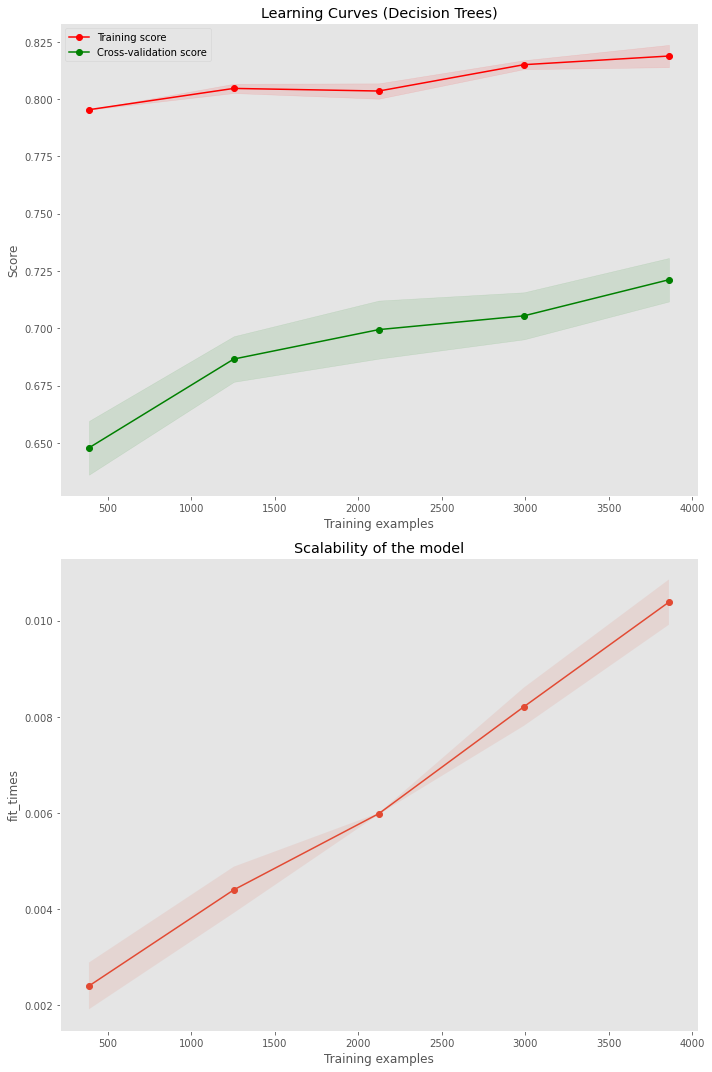

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (Decision Trees)"
estimator = DecisionTreeClassifier(min_samples_leaf=11)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes, cv=5)
plt.tight_layout()
plt.show()

Vemos en el primer gráfico que con más iteraciones en el cross validation no se obtiene un mejor resultado.

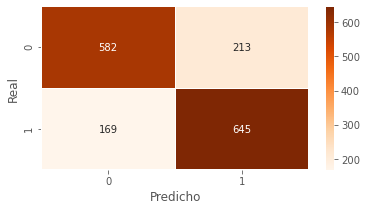

In [83]:
dtree_predict = dtree_modelo.best_estimator_.predict(X_test)

# Confussion Matrix

cm = confusion_matrix(y_test, dtree_predict)
matriz_confusion_df_ar = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_ar.columns.name = "Predicho"
matriz_confusion_df_ar.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_ar,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass


In [84]:
# classification report
cr = classification_report(y_test, dtree_predict)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, dtree_predict)
print('AUC Decision Trees: ', auc(fpr, tpr))

dtree_recall = recall_score(y_test, dtree_predict, average='binary')
print("Recall Decision Trees: ", dtree_recall)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       795
           1       0.75      0.79      0.77       814

    accuracy                           0.76      1609
   macro avg       0.76      0.76      0.76      1609
weighted avg       0.76      0.76      0.76      1609

Sensitivity :  0.7749667110519307
Specificity :  0.7517482517482518
AUC Decision Trees:  0.7622293820407028
Recall Decision Trees:  0.7923832923832924


En este caso tenemos un accuaracy del 0.71.

### Regresión Logística

Volveremos a utilizar la función RandomizedSearchCV para encontrar los mejores parámetros para el modelo

In [85]:
regresion = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]}


In [86]:
model_reg = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = regresion, n_iter = 100, 
                               cv = 5, verbose= 5, random_state= 1234, n_jobs = -1)
model_reg.fit(x_train_norm, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\breca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7,
                                              0.9]},
                   random_state=1234, verbose=5)

In [87]:
print(model_reg.best_params_)

{'C': 0.4}


In [88]:
print(model_reg.best_score_)

0.7180463210289748


In [89]:
# Puntuamos

from sklearn.metrics import recall_score
prediccionreg = model_reg.best_estimator_.predict(x_test_norm)

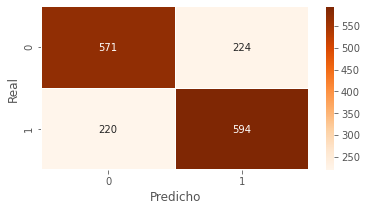

In [90]:
# Confussion Matrix

cm = confusion_matrix(y_test, prediccionreg)

matriz_confusion_df = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

In [91]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                  y_pred =  model_reg.best_estimator_.predict(x_test_norm), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.7240522063393412


In [92]:
from sklearn.metrics import accuracy_score

accuracy_en_test = accuracy_score(y_true = y_test,
                                 y_pred = model_reg.best_estimator_.predict(x_test_norm)
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.7240522063393412


In [93]:

# classification report : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# Muestra las principales métricas de clasificación 

cr = classification_report(y_test, prediccionreg)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, prediccionreg)
print('AUC Regresión Logística: ', auc(fpr, tpr))

lr_recall = recall_score(y_test, prediccionreg, average='binary')
print("Recall Logistic Regression: ", lr_recall)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       795
           1       0.73      0.73      0.73       814

    accuracy                           0.72      1609
   macro avg       0.72      0.72      0.72      1609
weighted avg       0.72      0.72      0.72      1609

Sensitivity :  0.7218710493046776
Specificity :  0.726161369193154
AUC Regresión Logística:  0.7239843617202109
Recall Logistic Regression:  0.7297297297297297


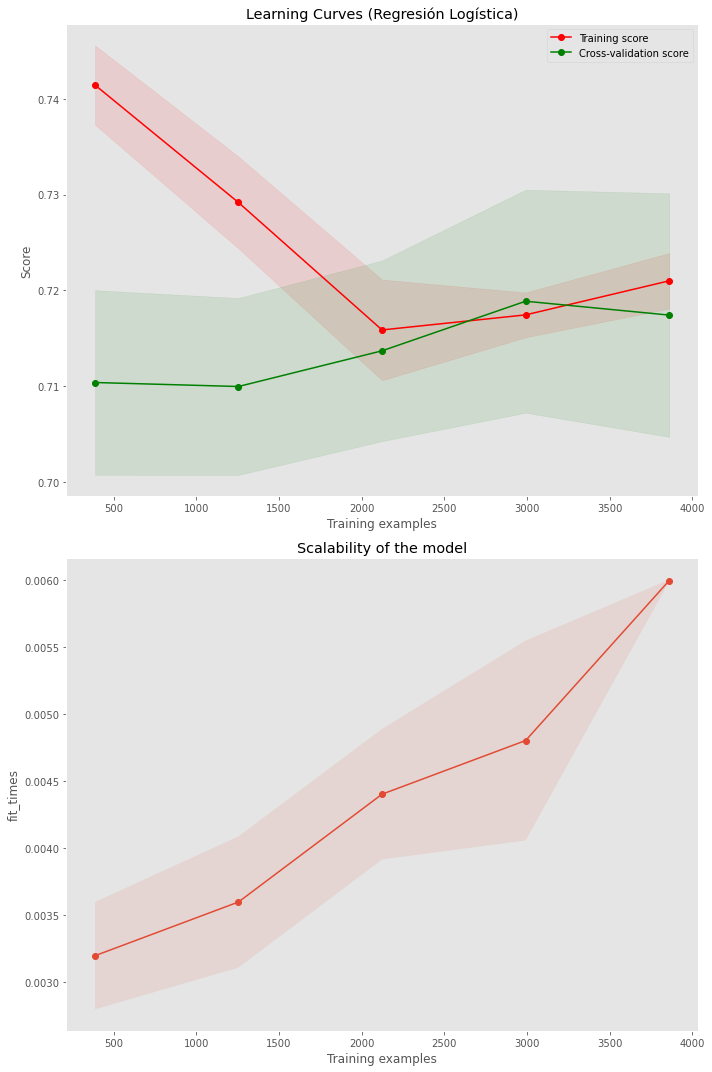

In [94]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (Regresión Logística)"
estimator = LogisticRegression(C = 0.2)
plot_learning_curve(estimator, title, x_train_norm, y_train, axes=axes)
plt.tight_layout()
plt.show()

Como vemos aunque en un principio la curva de entrenamiento empieza con valores más altos va disminuyendo, al contrario que la de cross validation.

### Random Forest

Volveremos a utilizar la función RandomizedSearchCV para encontrar los mejores parámetros para el modelo

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [95]:
rf_param = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(2, 10, 1, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16],
               'min_samples_split': [10, 15, 20, 30, 40, 50],
               'n_estimators': list(np.linspace(10, 150, 5, dtype = int))}



In [96]:
rf_modelo = RandomizedSearchCV(RandomForestClassifier(), rf_param, n_iter = 100, 
                                 cv = 5, verbose= 5, random_state= 1234, n_jobs = -1)
rf_modelo.fit(x_train_norm, y_train)
print(rf_modelo.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.4s finished


{'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


In [97]:
print(rf_modelo.best_params_)

{'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


In [98]:
print(rf_modelo.best_score_)

0.7648642444136925


In [99]:
gs_random_forest = GridSearchCV(RandomForestClassifier(),
                                rf_param,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)

In [100]:

gs_random_forest.fit(x_train_norm, y_train)


Fitting 10 folds for each of 3360 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6850 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7800 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8850 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 10000 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 11250 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 12600 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 14050 tasks  

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16],
                         'min_samples_split': [10, 15, 20, 30, 40, 50],
                         'n_estimators': [10, 45, 80, 115, 150]},
             scoring='f1_micro', verbose=1)

In [101]:
print(gs_random_forest.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [102]:
print(gs_random_forest.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [103]:
# Puntuamos


rf_prediccion = rf_modelo.best_estimator_.predict(x_test_norm)
#gs_random_forest_pred = gs_random_forest.best_estimator_.predict(x_test_norm)


Con RandomizedSearchCV


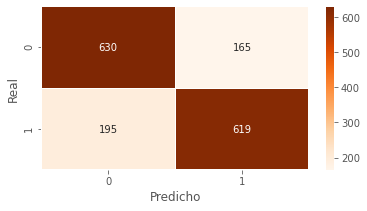

In [104]:
# Confussion Matrix

print("Con RandomizedSearchCV")
cm = confusion_matrix(y_test, rf_prediccion)

matriz_confusion_df_rf = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_rf.columns.name = "Predicho"
matriz_confusion_df_rf.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_rf,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass



In [105]:

# classification report
cr = classification_report(y_test, rf_prediccion)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, rf_prediccion)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, rf_prediccion, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       795
           1       0.79      0.76      0.77       814

    accuracy                           0.78      1609
   macro avg       0.78      0.78      0.78      1609
weighted avg       0.78      0.78      0.78      1609

Sensitivity :  0.7636363636363637
Specificity :  0.7895408163265306
AUC Random Forest:  0.7764475453154699
Recall Random Forest:  0.7604422604422605


In [106]:
from sklearn.metrics import accuracy_score

accuracy_en_test = accuracy_score(y_true = y_test,
                                 y_pred = rf_modelo.best_estimator_.predict(x_test_norm)
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.776258545680547


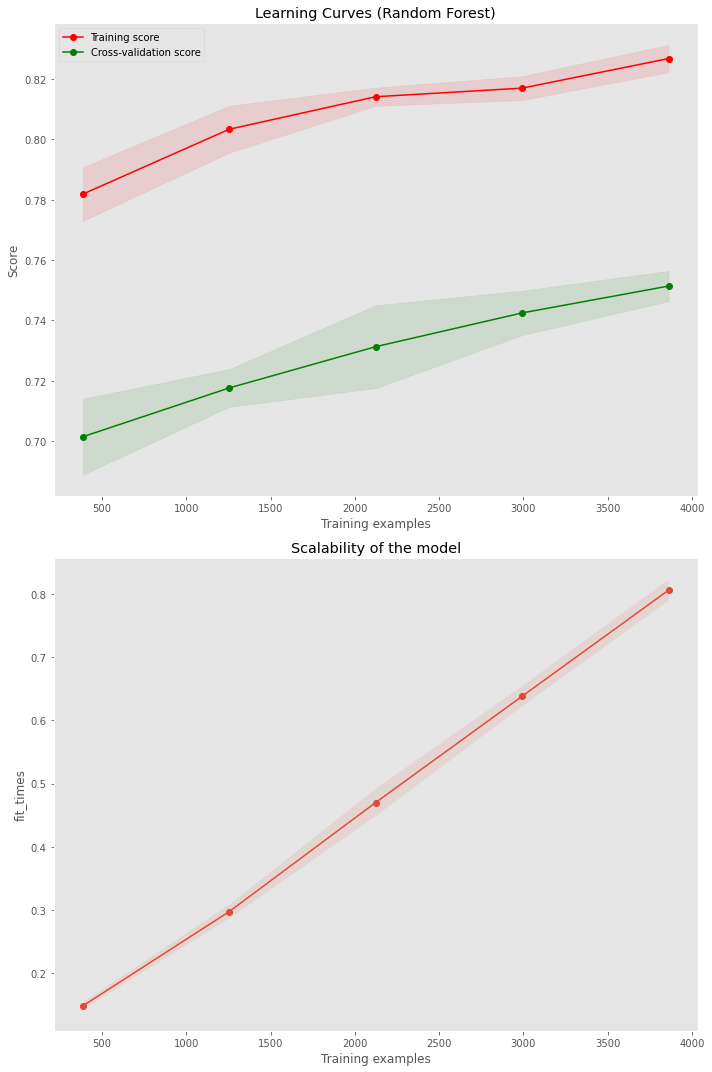

In [107]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(min_samples_leaf=15, n_estimators=115, min_samples_split=30, max_features=None, max_depth=None, criterion='entropy')
plot_learning_curve(estimator, title, x_train_norm, y_train, axes=axes, cv=5)
plt.tight_layout()
plt.show()

### Gradient Boosting


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [108]:
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
gradient_boosting = GradientBoostingClassifier()


gb_param = {  'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90,100,200], # Un númmero demasiado alto podría darnos sobreajuste 
              'learning_rate': [0.01,0.05, 0.09, 0.1, 0.15, 0.2],
              'max_depth': [1, 2, 3, 4, 5, 6],
              'subsample': [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento
              'max_features': ["sqrt", 3, 4],
              'loss': ['deviance', 'log_loss'],
           }



In [109]:


xg_modelo = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = gb_param, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 1234, n_jobs = -1)



In [110]:
xg_modelo.fit(x_train_norm, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.5s finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.09, 0.1,
                                                          0.15, 0.2],
                                        'loss': ['deviance', 'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 3, 4],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 200],
                                        'subsample': [1.0, 0.8, 0.5]},
                   random_state=1234, verbose=5)

In [111]:
print(xg_modelo.best_params_)

{'subsample': 1.0, 'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.2}


In [112]:
print(xg_modelo.best_score_)

0.8214298600551532


In [113]:
gs_gradient_boosting = GridSearchCV(GradientBoostingClassifier(),
                                    gb_param,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)


In [114]:
gs_gradient_boosting.fit(x_train_norm, y_train)

Fitting 10 folds for each of 6480 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1826 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 3776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4626 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 13218 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14368 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 15618 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 25017 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 26530 tasks

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.15, 0.2],
                         'loss': ['deviance', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 3, 4],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          200],
                         'subsample': [1.0, 0.8, 0.5]},
             scoring='f1_micro', verbose=1)

In [115]:
print(gs_gradient_boosting.best_score_)

0.828880269408864


In [116]:
# Puntuamos


xg_prediccion = xg_modelo.best_estimator_.predict(x_test_norm)


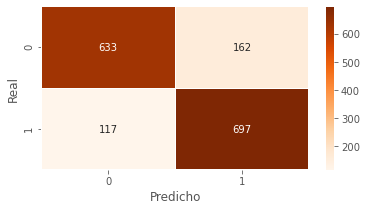

In [117]:
# Confussion Matrix

cm = confusion_matrix(y_test, xg_prediccion)

matriz_confusion_df_rf = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_rf.columns.name = "Predicho"
matriz_confusion_df_rf.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_rf,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

In [118]:

# classification report
cr = classification_report(y_test, xg_prediccion)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, xg_prediccion)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, xg_prediccion, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       795
           1       0.81      0.86      0.83       814

    accuracy                           0.83      1609
   macro avg       0.83      0.83      0.83      1609
weighted avg       0.83      0.83      0.83      1609

Sensitivity :  0.844
Specificity :  0.8114086146682189
AUC Random Forest:  0.826245885679848
Recall Random Forest:  0.8562653562653563


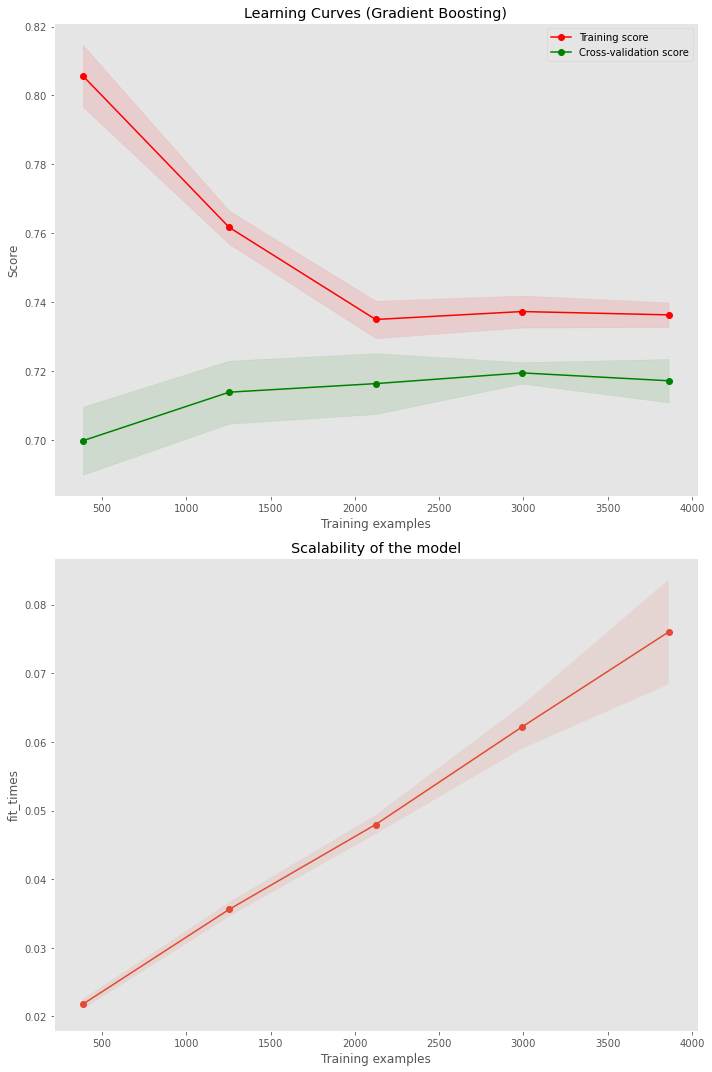

In [119]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (Gradient Boosting)"
estimator = GradientBoostingClassifier(subsample= 0.5,n_estimators=50, min_samples_split=30, max_features=4, max_depth=2, loss='deviance',learning_rate= 0.15)
plot_learning_curve(estimator, title, x_train_norm, y_train, axes=axes, cv=5)
plt.tight_layout()
plt.show()

Vemos que el entrenamiento empieza alto y va descendiendo

### Adaboost Classifier

In [120]:

from sklearn.ensemble import AdaBoostClassifier

adaboost_param = {'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.15, 0.2,0.3,0.4]}



In [121]:

adaboost_modelo = RandomizedSearchCV(estimator = AdaBoostClassifier(), param_distributions = adaboost_param, n_iter = 100, 
                               cv = 5, verbose= 5, random_state= 1234, n_jobs = -1)


In [122]:
adaboost_modelo.fit(X_train, y_train)


C:\Users\breca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.09, 0.1,
                                                          0.15, 0.2, 0.3,
                                                          0.4]},
                   random_state=1234, verbose=5)

In [123]:
print(adaboost_modelo.best_params_)

{'learning_rate': 0.3}


In [124]:
print(adaboost_modelo.best_score_)

0.7221916132977182


In [125]:
# Puntuamos


adaboost_prediccion = adaboost_modelo.best_estimator_.predict(x_test_norm)
adaboost_prediccion

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

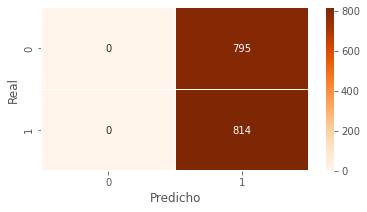

In [126]:
# Confussion Matrix

cm = confusion_matrix(y_test, adaboost_prediccion)

matriz_confusion_df_ab = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_ab.columns.name = "Predicho"
matriz_confusion_df_ab.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_ab,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

### k-Nearest Neighbors


In [184]:
from sklearn.neighbors import KNeighborsClassifier


knn_param = {'n_neighbors' : range(2,50),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidian', 'manhattan']}



In [185]:
knn_modelo = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = knn_param, n_iter = 20, 
                               cv = 5, verbose= 5, random_state= 1234, n_jobs = -1)


In [186]:
knn_modelo.fit(x_train_norm, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidian', 'manhattan'],
                                        'n_neighbors': range(2, 50),
                                        'weights': ['uniform', 'distance']},
                   random_state=1234, verbose=5)

In [187]:
print(knn_modelo.best_params_)

{'weights': 'distance', 'n_neighbors': 47, 'metric': 'manhattan'}


In [188]:
print(knn_modelo.best_score_)

0.821835033630483


In [189]:
# Puntuamos


knn_prediccion = knn_modelo.best_estimator_.predict(x_test_norm)
knn_prediccion

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

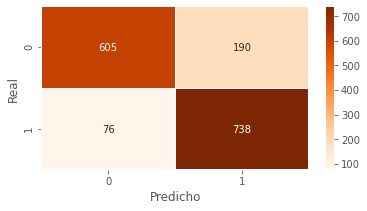

In [190]:
# Confussion Matrix

cm = confusion_matrix(y_test, knn_prediccion)

matriz_confusion_df_knn = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_knn.columns.name = "Predicho"
matriz_confusion_df_knn.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_knn,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

In [191]:

# classification report
cr = classification_report(y_test, knn_prediccion)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, knn_prediccion)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, knn_prediccion, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       795
           1       0.80      0.91      0.85       814

    accuracy                           0.83      1609
   macro avg       0.84      0.83      0.83      1609
weighted avg       0.84      0.83      0.83      1609

Sensitivity :  0.8883994126284875
Specificity :  0.7952586206896551
AUC Random Forest:  0.8338200979710415
Recall Random Forest:  0.9066339066339066


In [192]:
#{'weights': 'distance', 'n_neighbors': 37, 'metric': 'manhattan'}

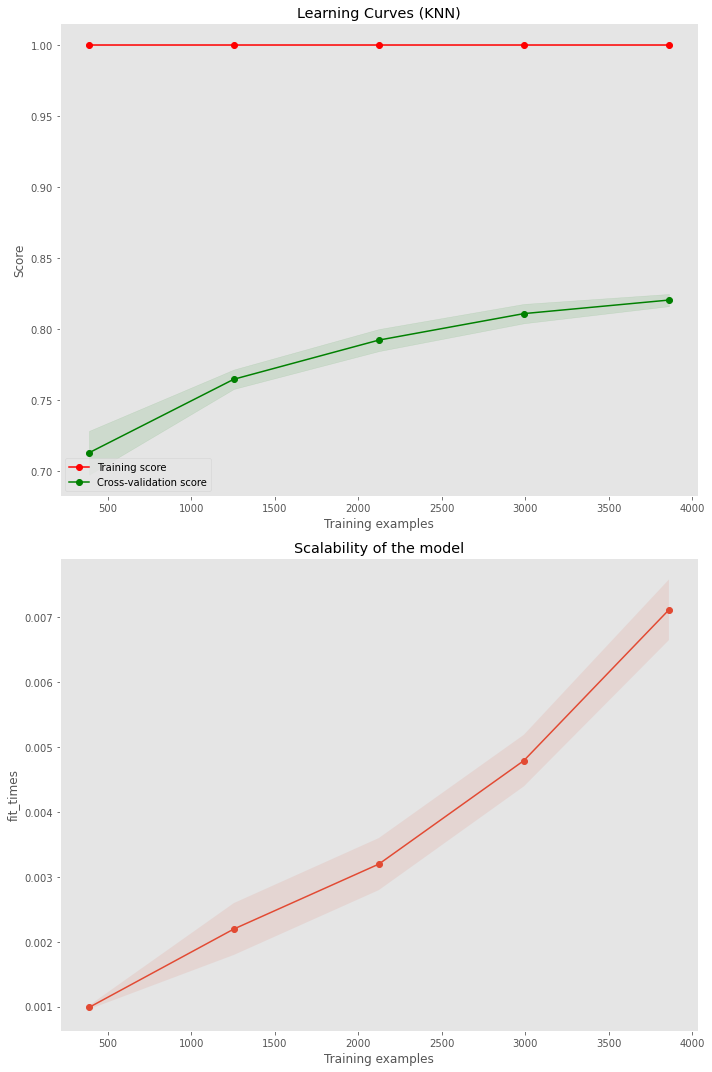

In [193]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (KNN)"
estimator = KNeighborsClassifier(n_neighbors = 37, metric='manhattan', weights = 'distance')
plot_learning_curve(estimator, title, x_train_norm, y_train, axes=axes, cv=5)
plt.tight_layout()
plt.show()

### Support Vector Machine

In [137]:

svc_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 5.0, 50.0]}




In [138]:
svm_modelo = RandomizedSearchCV(estimator = SVC(), param_distributions = svc_params, n_iter = 20, 
                               cv = 5, verbose= 5, random_state= 1234, n_jobs = -1)

In [139]:
svm_modelo.fit(x_train_norm, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:    4.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9,
                                              5.0, 50.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=1234, verbose=5)

In [140]:
print(svm_modelo.best_params_)

{'kernel': 'rbf', 'C': 0.6}


In [141]:

print(svm_modelo.best_score_)

0.7284047243587681


In [142]:
# Puntuamos

svm_prediccion = svm_modelo.best_estimator_.predict(x_test_norm)
svm_prediccion

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

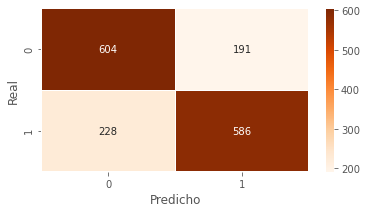

In [143]:
# Confussion Matrix

cm = confusion_matrix(y_test, svm_prediccion)

matriz_confusion_df_knn = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_knn.columns.name = "Predicho"
matriz_confusion_df_knn.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_knn,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass

In [144]:

# classification report
cr = classification_report(y_test, svm_prediccion)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, svm_prediccion)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, svm_prediccion, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       795
           1       0.75      0.72      0.74       814

    accuracy                           0.74      1609
   macro avg       0.74      0.74      0.74      1609
weighted avg       0.74      0.74      0.74      1609

Sensitivity :  0.7259615384615384
Specificity :  0.7541827541827542
AUC Random Forest:  0.739825073787338
Recall Random Forest:  0.7199017199017199


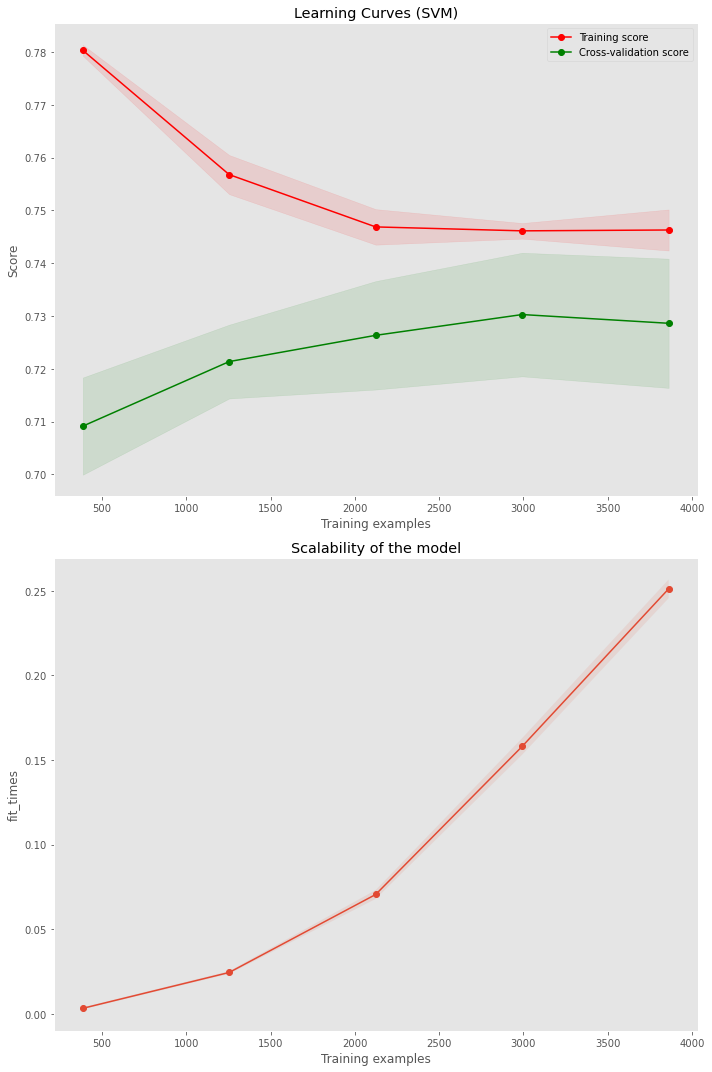

In [145]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

title = "Learning Curves (SVM)"
estimator = SVC(kernel = 'rbf', C = 0.9)
plot_learning_curve(estimator, title, x_train_norm, y_train, axes=axes, cv=5)
plt.tight_layout()
plt.show()

## Comparación de modelos

Se compararán los distintos modelos que se han realizado. Se evaluarán las metricas vistas a lo largo del proyecto en la tabla de test, También se compararán las curvas ROC, para elegir el mejor modelo

In [194]:
modelos = {'Base': random_model, 'Árbol Decisión': regressor, 'Árbol Decisión Mejor Estimador': dtree_modelo.best_estimator_,
          'Regresión Logística': model_reg.best_estimator_, 'Random Forest': rf_modelo.best_estimator_, 
          'XG-Boost': xg_modelo.best_estimator_, 'KNN': knn_modelo.best_estimator_, 
          'Adaboost': adaboost_modelo.best_estimator_, 'SVM': svm_modelo.best_estimator_}

In [195]:
modelos

{'Base': <__main__.RandomModel at 0x245d852cd30>,
 'Árbol Decisión': DecisionTreeRegressor(criterion='mae', max_depth=12, random_state=0),
 'Árbol Decisión Mejor Estimador': DecisionTreeClassifier(min_samples_leaf=2),
 'Regresión Logística': LogisticRegression(C=0.4),
 'Random Forest': RandomForestClassifier(max_features=None, min_samples_leaf=10,
                        min_samples_split=10, n_estimators=80),
 'XG-Boost': GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='sqrt',
                            n_estimators=200),
 'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=47, weights='distance'),
 'Adaboost': AdaBoostClassifier(learning_rate=0.3),
 'SVM': SVC(C=0.6)}

Para los modelos sobre los que se ha utilizado una librería de busqueda de mejores parámetros sacamos su mejor score

In [196]:
modelos_score = {'Árbol Decisión Mejor Estimador': dtree_modelo.best_score_,
          'Regresión Logística': model_reg.best_score_, 'Random Forest': rf_modelo.best_score_, 
          'XG-Boost': xg_modelo.best_score_, 'KNN': knn_modelo.best_score_, 
          'Adaboost': adaboost_modelo.best_score_, 'SVM': svm_modelo.best_score_}

In [197]:
modelos_score

{'Árbol Decisión Mejor Estimador': 0.7607243799558431,
 'Regresión Logística': 0.7180463210289748,
 'Random Forest': 0.7648642444136925,
 'XG-Boost': 0.8214298600551532,
 'KNN': 0.821835033630483,
 'Adaboost': 0.7221916132977182,
 'SVM': 0.7284047243587681}

### Comprobación con GridSearchCV con los tres modelos que obtienen mejores resultados

##### KNN


In [198]:
gs_knn = GridSearchCV(KNeighborsClassifier(),
                                  knn_param,
                                  cv=10,
                                  scoring='f1_micro',
                                  verbose=1,
                                  n_jobs=-1)


In [199]:
gs_knn.fit(x_train_norm, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    7.0s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': range(2, 50),
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro', verbose=1)

In [200]:
print(gs_knn.best_params_)
print(gs_knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'distance'}
0.8288845648308033


##### Boosting


In [201]:
gs_gradient_boosting = GridSearchCV(GradientBoostingClassifier(),
                                    gb_param,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)
gs_gradient_boosting.fit(x_train_norm, y_train)

Fitting 10 folds for each of 6480 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1257 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 2066 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 3266 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 4016 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4866 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 13649 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14978 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16128 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 23762 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 25576 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 27026 task

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.15, 0.2],
                         'loss': ['deviance', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 3, 4],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          200],
                         'subsample': [1.0, 0.8, 0.5]},
             scoring='f1_micro', verbose=1)

In [202]:
print(gs_gradient_boosting.best_params_)
print(gs_gradient_boosting.best_score_)

{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
0.8280607029028462


##### Random Forest


In [203]:
gs_random_forest = GridSearchCV(RandomForestClassifier(),
                                rf_param,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)
gs_random_forest.fit(x_train_norm, y_train)

Fitting 10 folds for each of 3360 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7250 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 8200 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9250 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 10400 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 11650 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 13000 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 14450 tasks  

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16],
                         'min_samples_split': [10, 15, 20, 30, 40, 50],
                         'n_estimators': [10, 45, 80, 115, 150]},
             scoring='f1_micro', verbose=1)

In [204]:
print(gs_random_forest.best_params_)
print(gs_random_forest.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 115}
0.7783308849428279


#### Modelos con mejores resultados

In [206]:
modelos_3best = {'Random Forest': gs_random_forest.best_estimator_, 
          'XG-Boost': gs_gradient_boosting.best_estimator_,
          'KNN': gs_knn.best_estimator_}
modelos_3best

{'Random Forest': RandomForestClassifier(criterion='entropy', max_features=None,
                        min_samples_leaf=10, min_samples_split=10,
                        n_estimators=115),
 'XG-Boost': GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='sqrt',
                            n_estimators=200, subsample=0.8),
 'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=49, weights='distance')}

In [207]:
modelos_score3best = {'Random Forest': gs_random_forest.best_score_, 
          'XG-Boost': gs_gradient_boosting.best_score_,
          'KNN': gs_knn.best_score_}
modelos_score3best

{'Random Forest': 0.7783308849428279,
 'XG-Boost': 0.8280607029028462,
 'KNN': 0.8288845648308033}

### KNN

In [223]:
knn_prediccion2 = gs_knn.predict(X_test)

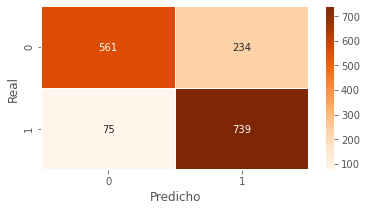

In [224]:

cm = confusion_matrix(y_test, knn_prediccion2)

matriz_confusion_df_knn = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_knn.columns.name = "Predicho"
matriz_confusion_df_knn.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_knn,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass


In [233]:
cr = classification_report(y_test, knn_prediccion2)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, knn_prediccion2)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, knn_prediccion2, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       795
           1       0.76      0.91      0.83       814

    accuracy                           0.81      1609
   macro avg       0.82      0.81      0.81      1609
weighted avg       0.82      0.81      0.81      1609

Sensitivity :  0.8606896551724138
Specificity :  0.8065610859728507
AUC Random Forest:  0.8067613926104493
Recall Random Forest:  0.9078624078624079


### Boosting

In [234]:
cr = classification_report(y_test, xg_prediccion2)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, xg_prediccion2)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, xg_prediccion2, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       795
           1       0.81      0.88      0.84       814

    accuracy                           0.83      1609
   macro avg       0.83      0.83      0.83      1609
weighted avg       0.83      0.83      0.83      1609

Sensitivity :  0.8606896551724138
Specificity :  0.8065610859728507
AUC Random Forest:  0.8304135181493671
Recall Random Forest:  0.8759213759213759


In [227]:
# Puntuamos

xg_prediccion2 = gs_gradient_boosting.predict(X_test)

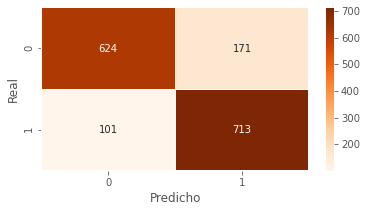

In [228]:

# Confussion Matrix

cm = confusion_matrix(y_test, xg_prediccion2)

matriz_confusion_df_xg = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_xg.columns.name = "Predicho"
matriz_confusion_df_xg.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_xg,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass


In [230]:
cr = classification_report(y_test, xg_prediccion2)
print(cr)

# Sensitivity y Specificity
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, xg_prediccion2)
print('AUC Random Forest: ', auc(fpr, tpr))

rf_recall = recall_score(y_test, xg_prediccion2, average='binary')
print("Recall Random Forest: ", rf_recall)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       795
           1       0.81      0.88      0.84       814

    accuracy                           0.83      1609
   macro avg       0.83      0.83      0.83      1609
weighted avg       0.83      0.83      0.83      1609

Sensitivity :  0.8606896551724138
Specificity :  0.8065610859728507
AUC Random Forest:  0.8304135181493671
Recall Random Forest:  0.8759213759213759


### Comprobación sobre test

## Boosting

Seleccionamos el modelo del boosting y probamos sobre test

In [208]:
modelo_boost = gs_gradient_boosting.best_estimator_
modelo_boost

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='sqrt',
                           n_estimators=200, subsample=0.8)

In [209]:
modelo_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='sqrt',
                           n_estimators=200, subsample=0.8)

In [210]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                 y_pred = modelo_boost.predict(X_test), average='micro'
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.8309509011808577


### KNN

In [211]:
modelo_knn = gs_knn.best_estimator_
modelo_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=49, weights='distance')

In [212]:
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=49, weights='distance')

In [213]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                 y_pred = modelo_knn.predict(X_test), average='micro'
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.8079552517091361


In [171]:
# Matriz Modelo 

In [172]:
gs_gradient_boosting = GridSearchCV(GradientBoostingClassifier(),
                                    gb_param,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)



In [173]:

gs_gradient_boosting.fit(x_train_norm, y_train)



Fitting 10 folds for each of 6480 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1634 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 2834 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 4434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 13074 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 14224 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 15474 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 22473 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 23938 tasks 

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.15, 0.2],
                         'loss': ['deviance', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 3, 4],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          200],
                         'subsample': [1.0, 0.8, 0.5]},
             scoring='f1_micro', verbose=1)

In [174]:
xg_prediccion2 = gs_gradient_boosting.best_estimator_.predict(x_test_norm)

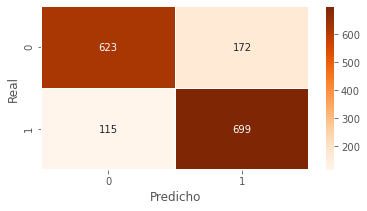

In [175]:
# Confussion Matrix

cm = confusion_matrix(y_test, xg_prediccion2)

matriz_confusion_df_rf = pd.DataFrame(cm)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df_rf.columns.name = "Predicho"
matriz_confusion_df_rf.index.name = "Real"
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df_rf,                     
            annot=True,                     
            cmap="Oranges",linewidths=.10, fmt= '.0f')
pass


In [176]:
https://anderfernandez.com/blog/programar-arbol-decision-python-desde-0/
    
https://docs.microsoft.com/es-es/azure/machine-learning/how-to-machine-learning-interpretability-aml
    
    
    https://machinelearningenespanol.com/2021/01/12/evaluacion-de-modelos-predictivos/
    
    
    
    https://programmerclick.com/article/4356413551/
        
        https://github.com/SoftDani/Notebooks/blob/main/TFM/TFM_560_480_%20rangos_v3.ipynb
            
            https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
            
            
            
            https://github.com/lautarodc/UCI-Heart-Disease/blob/main/AM%201%20-%20Heart%20Desease%20-%20Lautaro%20Delgado.ipynb

SyntaxError: invalid syntax (<ipython-input-176-0772603536ec>, line 1)

In [177]:
# Parámetros SVM
svc_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 5.0, 50.0]}

# Parámetros KNN

knn_param = {'n_neighbors' : range(2,50),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidian', 'manhattan']}

# Parámetros Adaboost

adaboost_param = {'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.15, 0.2,0.3,0.4]}

# Parámetros Boosting


gb_param = {  'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90,100,200], # Un númmero demasiado alto podría darnos sobreajuste 
              'learning_rate': [0.01,0.05, 0.09, 0.1, 0.15, 0.2],
              'max_depth': [1, 2, 3, 4, 5, 6],
              'subsample': [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento
              'max_features': ["sqrt", 3, 4],
              'loss': ['deviance', 'log_loss'],
           }

# Parámetros Random Forest

rf_param = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(2, 10, 1, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16],
               'min_samples_split': [10, 15, 20, 30, 40, 50],
               'n_estimators': list(np.linspace(10, 150, 5, dtype = int))}

# Parámetros regresión

regresion = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]}

# Parámetros árbol de decisión

dtree_params = {'min_samples_leaf': [i for i in range(2,20)]}